Import Libraries

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

Load the Data

In [67]:
data = pd.read_csv('/Users/sabafirdausansaria/Downloads/NN_Perceptron_MLP_Project/dataset/breast-cancer.csv')

In [68]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
data.shape[0]

569

In [70]:
data.shape[1]

32

Encode the target diagnosis using LabelEncoder() and fit_transform()

In [71]:
LE = LabelEncoder()
data['diagnosis'] = LE.fit_transform(data['diagnosis'])
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Separating Features and Labels

In [72]:
X = data.drop(['id', 'diagnosis'], axis=1, errors='ignore').values
y = data['diagnosis'].values

Train and test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train.shape[1]

30

Scaling the features 

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Convert to PyTorch Tensor

In [76]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

Describe the Perceptron model

In [77]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1) #single neuron

    def forward(self, x):
        return torch.sigmoid(self.fc(x))    #Binary output
    
    

Train the model

In [79]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, lr):
    criterion = nn.BCELoss() #Binay Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        #Forward pass 
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        #Backward pass and optimization
        optimizer.zero_grad() #Clears old gradients (otherwise they accumulate each iteration)
        loss.backward() #Computes gradients of the loss w.r.t. model parameters
        optimizer.step() #Updates model weights using the chosen optimization algorithm (like SGD, Adam)

        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    #Evaluate
    with torch.no_grad():#turns off gradient tracking (saves memory and speeds up evaluation since we don’t need backprop)
        y_pred = model(X_test) #gets predicted probabilities
        y_pred_cls = (y_pred >= 0.5).float() #Convert probabilities → classes  (0 or 1) using thresholf of 0.5
        acc = accuracy_score(y_test, y_pred_cls)
        print("Test Accuracy: ", acc*100) 
               

Running the Perceptron

In [81]:
perceptron = Perceptron(input_dim=30)
train_model(perceptron, X_train_t, y_train_t, X_test_t, y_test_t, epochs=200, lr=0.01)

Epoch [10/200], Loss: 0.3761
Epoch [20/200], Loss: 0.2345
Epoch [30/200], Loss: 0.1764
Epoch [40/200], Loss: 0.1485
Epoch [50/200], Loss: 0.1322
Epoch [60/200], Loss: 0.1212
Epoch [70/200], Loss: 0.1131
Epoch [80/200], Loss: 0.1068
Epoch [90/200], Loss: 0.1016
Epoch [100/200], Loss: 0.0973
Epoch [110/200], Loss: 0.0936
Epoch [120/200], Loss: 0.0904
Epoch [130/200], Loss: 0.0876
Epoch [140/200], Loss: 0.0851
Epoch [150/200], Loss: 0.0829
Epoch [160/200], Loss: 0.0809
Epoch [170/200], Loss: 0.0791
Epoch [180/200], Loss: 0.0775
Epoch [190/200], Loss: 0.0760
Epoch [200/200], Loss: 0.0746
Test Accuracy:  99.12280701754386


Multi-Layer Perceptron (MLP)

In [82]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32) #Hidden LAYER WITH 32 NEURONS
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1) #Output layer

    def forward(self, x):    
        #print("Input:", x.shape)
        x = self.relu(self.fc1(x))
        #print("After fc1:", x.shape)
        x = self.relu(self.fc2(x))
        #print("After fc2:", x.shape)
        x = self.fc3(x)
        #print("After fc3:", x.shape)
        return torch.sigmoid(x)#Binary Output
    

In [83]:
mlp = MLP(input_dim=X_train.shape[1])
train_model(mlp, X_train_t, y_train_t, X_test_t, y_test_t, epochs=200, lr=0.001)

Epoch [10/200], Loss: 0.6759
Epoch [20/200], Loss: 0.6143
Epoch [30/200], Loss: 0.5328
Epoch [40/200], Loss: 0.4344
Epoch [50/200], Loss: 0.3344
Epoch [60/200], Loss: 0.2504
Epoch [70/200], Loss: 0.1913
Epoch [80/200], Loss: 0.1519
Epoch [90/200], Loss: 0.1257
Epoch [100/200], Loss: 0.1080
Epoch [110/200], Loss: 0.0957
Epoch [120/200], Loss: 0.0868
Epoch [130/200], Loss: 0.0798
Epoch [140/200], Loss: 0.0742
Epoch [150/200], Loss: 0.0694
Epoch [160/200], Loss: 0.0653
Epoch [170/200], Loss: 0.0617
Epoch [180/200], Loss: 0.0583
Epoch [190/200], Loss: 0.0553
Epoch [200/200], Loss: 0.0524
Test Accuracy:  98.24561403508771


In [84]:
import matplotlib.pyplot as plt
# -----------------------------
# Visualization function
# -----------------------------
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(
        torch.arange(x_min, x_max, 0.05),
        torch.arange(y_min, y_max, 0.05),
        indexing="xy"
    )
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    with torch.no_grad():
        preds = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, preds.numpy(), alpha=0.3, cmap="RdBu")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolor="k")
    plt.title(title)

Epoch [10/200], Loss: 0.3319
Epoch [20/200], Loss: 0.2043
Epoch [30/200], Loss: 0.1571
Epoch [40/200], Loss: 0.1343
Epoch [50/200], Loss: 0.1209
Epoch [60/200], Loss: 0.1118
Epoch [70/200], Loss: 0.1051
Epoch [80/200], Loss: 0.0998
Epoch [90/200], Loss: 0.0954
Epoch [100/200], Loss: 0.0916
Epoch [110/200], Loss: 0.0884
Epoch [120/200], Loss: 0.0856
Epoch [130/200], Loss: 0.0831
Epoch [140/200], Loss: 0.0809
Epoch [150/200], Loss: 0.0790
Epoch [160/200], Loss: 0.0772
Epoch [170/200], Loss: 0.0756
Epoch [180/200], Loss: 0.0741
Epoch [190/200], Loss: 0.0728
Epoch [200/200], Loss: 0.0716
Test Accuracy:  99.12280701754386


TypeError: 'NoneType' object is not callable

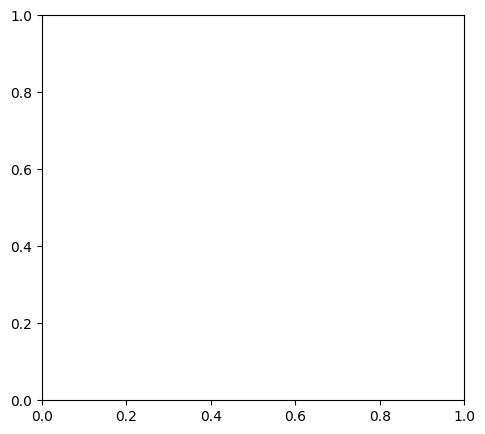

In [87]:
# -----------------------------
# Train & Plot
# -----------------------------
plt.figure(figsize=(12, 5))

# Perceptron
perceptron = Perceptron(30)
perceptron = train_model(perceptron, X_train_t, y_train_t, X_test_t, y_test_t, epochs=200, lr=0.01)
plt.subplot(1, 2, 1)
plot_decision_boundary(perceptron, X_train, y_train, "Perceptron (Linear)")

# MLP
mlp = MLP(30)
mlp = train_model(mlp, X_train_t, y_train_t, X_test_t, y_test_t, epochs=200, lr=0.001)
plt.subplot(1, 2, 2)
plot_decision_boundary(mlp, X_train, y_train, "MLP (Non-linear)")

plt.show()